In [1]:
import pandas as pd
import numpy as np

In [2]:
with pd.ExcelFile("/home/bobmaster/Downloads/数学建模/附件1：化学成分及力学性能.xlsx") as origin_data:
    pd_chemicals_raw = pd.read_excel(origin_data, "化学成分", usecols=[0,2,3,4,5,6,7])
    pd_physics_raw = pd.read_excel(origin_data, "力学性能")

In [3]:
pd_chemical = pd_chemicals_raw.iloc[1:,:]
pd_physics = pd_physics_raw.dropna(how = "any")
# pd_chemical = pd_chemical.reindex(index = pd_chemical.index[::-1])
pd_physics_ronglianhao = pd_physics.iloc[:,0].astype("int64")
pd_physics_qufu = pd_physics.iloc[:,2]
pd_physics_kangla = pd_physics.iloc[:,3]
pd_physics_yanshen = pd_physics.iloc[:,4]

In [4]:
# 提取相同熔炼号的数据
comp_table = pd_physics.iloc[:,0].duplicated(keep = "last") #比较表
# phy_num = pd_physics.count()  # 力学表数据量 11213
phy_num = 11213
#phy_ronglianhao = []
phy_dict = {}
phy_qufu = []
phy_kangla = []
phy_yanshen = []
temp = 0
for i in range(phy_num):
    phy_qufu.append(pd_physics_qufu[i])
    phy_kangla.append(pd_physics_kangla[i])
    phy_yanshen.append(pd_physics_yanshen[i])
    if (comp_table[i] == False):
        #phy_ronglianhao[temp] = pd_physics_ronglianhao[i]
        phy_dict[pd_physics_ronglianhao[i]] = [phy_qufu, phy_kangla, phy_yanshen]
        temp += 1
        phy_qufu = []
        phy_kangla = []
        phy_yanshen = []
        

In [5]:
# 数据规约 - 力学性能数据均值和标准差
phy_dict_qufu_mean = {}
phy_dict_qufu_std = {}
phy_dict_kangla_mean = {}
phy_dict_kangla_std = {}
phy_dict_yanshen_mean = {}
phy_dict_yanshen_std = {}
phy_dict_qufu_mean_list = []
phy_dict_qufu_std_list = []
phy_dict_kangla_mean_list = []
phy_dict_kangla_std_list = []
phy_dict_yanshen_mean_list = []
phy_dict_yanshen_std_list = []

for key in phy_dict:
    np_physics_array_qufu = np.array(phy_dict[key][0])
    np_physics_array_kangla = np.array(phy_dict[key][1])
    np_physics_array_yanshen = np.array(phy_dict[key][2])
    phy_dict_qufu_mean[key] = np_physics_array_qufu.mean()
    phy_dict_qufu_std[key] = np_physics_array_qufu.std()
    phy_dict_kangla_mean[key] = np_physics_array_kangla.mean()
    phy_dict_kangla_std[key] = np_physics_array_kangla.std()
    phy_dict_yanshen_mean[key] = np_physics_array_yanshen.mean()
    phy_dict_yanshen_std[key] = np_physics_array_yanshen.std()

    

In [6]:
# 清洗化学成分
# 重建索引保证在同一熔炼号的情况下与力学指标数据匹配
pd_chem_ronglianhao = pd_chemical.iloc[:,0].astype("int64")
pd_chem_ronglianhao = pd_chem_ronglianhao.drop_duplicates().reset_index().iloc[:,1]
pd_chem_E1_data = pd_chemical.iloc[:,1].reset_index().iloc[:,1]
pd_chem_E2_data = pd_chemical.iloc[:,2].reset_index().iloc[:,1]
pd_chem_E3_data = pd_chemical.iloc[:,3].reset_index().iloc[:,1]
pd_chem_E4_data = pd_chemical.iloc[:,4].reset_index().iloc[:,1]
pd_chem_E5_data = pd_chemical.iloc[:,5].reset_index().iloc[:,1]
pd_chem_E6_data = pd_chemical.iloc[:,6].reset_index().iloc[:,1]
pd_chem_E1 = {}
pd_chem_E2 = {}
pd_chem_E3 = {}
pd_chem_E4 = {}
pd_chem_E5 = {}
pd_chem_E6 = {}
temp = 0

# 数据规约 - 化学成分
# 0-701 清洗后得到的范围
for i in range(702):
    if (i%2 != 0 and temp != 321):
        pd_chem_E1[pd_chem_ronglianhao[temp]] = (pd_chem_E1_data[i-1] + pd_chem_E1_data[i])/2
        pd_chem_E2[pd_chem_ronglianhao[temp]] = (pd_chem_E2_data[i-1] + pd_chem_E2_data[i])/2
        pd_chem_E3[pd_chem_ronglianhao[temp]] = (pd_chem_E3_data[i-1] + pd_chem_E3_data[i])/2
        pd_chem_E4[pd_chem_ronglianhao[temp]] = (pd_chem_E4_data[i-1] + pd_chem_E4_data[i])/2
        pd_chem_E5[pd_chem_ronglianhao[temp]] = (pd_chem_E5_data[i-1] + pd_chem_E5_data[i])/2
        pd_chem_E6[pd_chem_ronglianhao[temp]] = (pd_chem_E6_data[i-1] + pd_chem_E6_data[i])/2
        temp += 1

E1_list = []
E2_list = []
E3_list = []
E4_list = []
E5_list = []
E6_list = []

# 整理出最终所需数据并保证化学成分与力学性能数据一致性
for key in pd_chem_E1:
    if key in phy_dict:
        E1_list.append(pd_chem_E1[key])
        E2_list.append(pd_chem_E2[key])
        E3_list.append(pd_chem_E3[key])
        E4_list.append(pd_chem_E4[key])
        E5_list.append(pd_chem_E5[key])
        E6_list.append(pd_chem_E6[key])
        
        phy_dict_qufu_mean_list.append(phy_dict_qufu_mean[key])
        phy_dict_qufu_std_list.append(phy_dict_qufu_std[key])
        phy_dict_kangla_mean_list.append(phy_dict_kangla_mean[key])
        phy_dict_kangla_std_list.append(phy_dict_kangla_std[key])
        phy_dict_yanshen_mean_list.append(phy_dict_yanshen_mean[key])
        phy_dict_yanshen_std_list.append(phy_dict_yanshen_std[key])
        
np_E1 = np.array(E1_list)
np_E2 = np.array(E2_list)
np_E3 = np.array(E3_list)
np_E4 = np.array(E4_list)
np_E5 = np.array(E5_list)
np_E6 = np.array(E6_list)

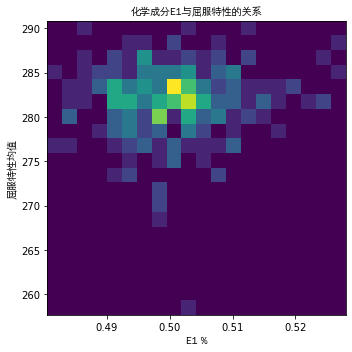

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/usr/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/wqy-zenhei.ttc')
fig, ax = plt.subplots(figsize=(5, 5), tight_layout=True)

#dist1 材料
dist1_E1 = np_E1
dist1_E2 = np_E2
dist1_E3 = np_E3
dist1_E4 = np_E4
dist1_E5 = np_E5
dist1_E6 = np_E6

#dist2 力学性能均值
dist2_qufu = np.array(phy_dict_qufu_mean_list)
dist2_kangla = np.array(phy_dict_kangla_mean_list)
dist2_yanshen = np.array(phy_dict_yanshen_mean_list)

#dist3 力学性能标准差
dist3_qufu = np.array(phy_dict_qufu_std_list)
dist3_kangla = np.array(phy_dict_kangla_std_list)
dist3_yanshen = np.array(phy_dict_yanshen_std_list)


ax.set_title("化学成分E1与屈服特性的关系", fontproperties=myfont)
ax.set_xlabel("E1 %", fontproperties=myfont)
ax.set_ylabel("屈服特性均值", fontproperties=myfont)
hist_qufu_E1 = ax.hist2d(dist1_E1, dist2_qufu, bins=20)

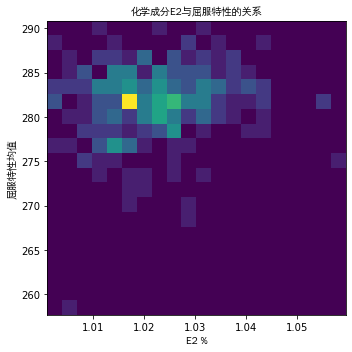

In [8]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("屈服特性均值", fontproperties=myfont)
ax.set_title("化学成分E2与屈服特性的关系", fontproperties=myfont)
ax.set_xlabel("E2 %", fontproperties=myfont)
hist_qufu_E2 = ax.hist2d(dist1_E2, dist2_qufu, bins=20)

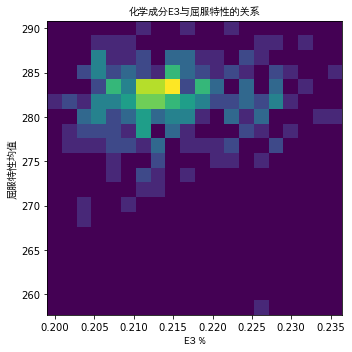

In [9]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("屈服特性均值", fontproperties=myfont)
ax.set_title("化学成分E3与屈服特性的关系", fontproperties=myfont)
ax.set_xlabel("E3 %", fontproperties=myfont)
hist_qufu_E3 = ax.hist2d(dist1_E3, dist2_qufu, bins=20)

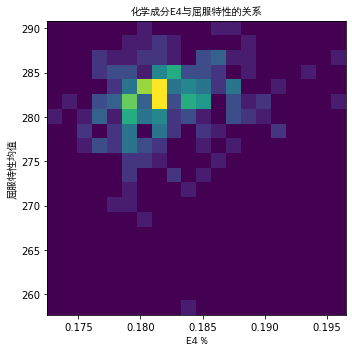

In [10]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("屈服特性均值", fontproperties=myfont)
ax.set_title("化学成分E4与屈服特性的关系", fontproperties=myfont)
ax.set_xlabel("E4 %", fontproperties=myfont)
hist_qufu_E4 = ax.hist2d(dist1_E4, dist2_qufu, bins=20)

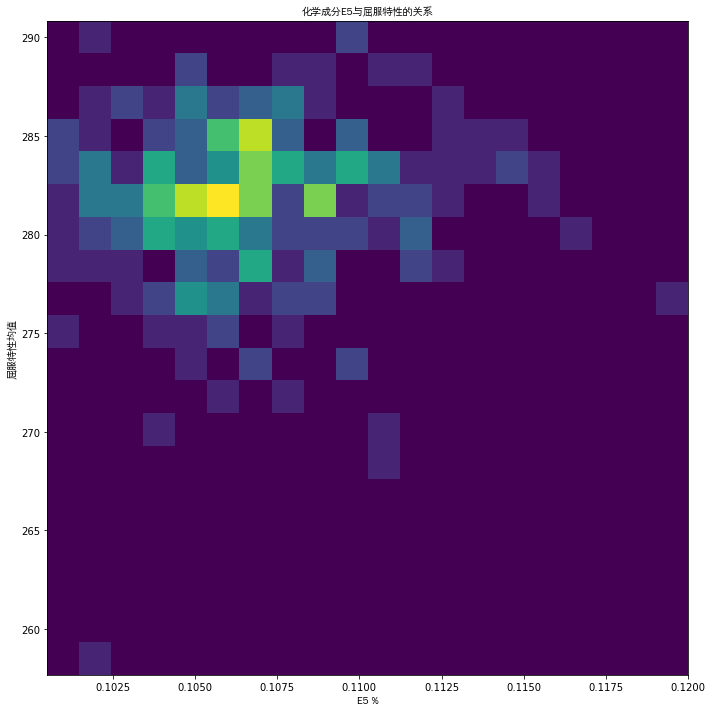

In [11]:
fig, ax = plt.subplots(figsize=(10, 10), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("屈服特性均值", fontproperties=myfont)
ax.set_title("化学成分E5与屈服特性的关系", fontproperties=myfont)
ax.set_xlabel("E5 %", fontproperties=myfont)
hist_qufu_E5 = ax.hist2d(dist1_E5, dist2_qufu, bins=20)

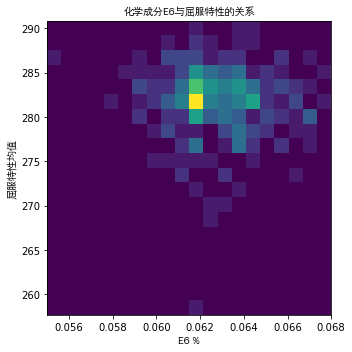

In [12]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("屈服特性均值", fontproperties=myfont)
ax.set_title("化学成分E6与屈服特性的关系", fontproperties=myfont)
ax.set_xlabel("E6 %", fontproperties=myfont)
hist_qufu_E6 = ax.hist2d(dist1_E6, dist2_qufu, bins=20)

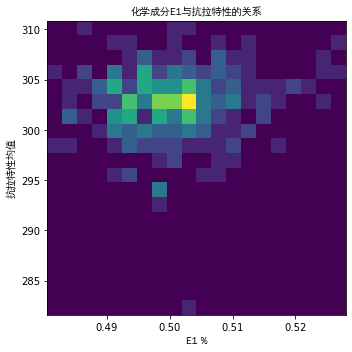

In [13]:
# 抗拉
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("抗拉特性均值", fontproperties=myfont)
ax.set_title("化学成分E1与抗拉特性的关系", fontproperties=myfont)
ax.set_xlabel("E1 %", fontproperties=myfont)
hist_kangla_E1 = ax.hist2d(dist1_E1, dist2_kangla, bins=20)

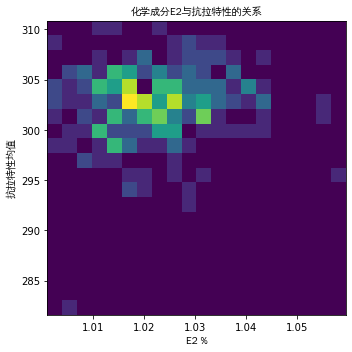

In [14]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("抗拉特性均值", fontproperties=myfont)
ax.set_title("化学成分E2与抗拉特性的关系", fontproperties=myfont)
ax.set_xlabel("E2 %", fontproperties=myfont)
hist_kangla_E2 = ax.hist2d(dist1_E2, dist2_kangla, bins=20)

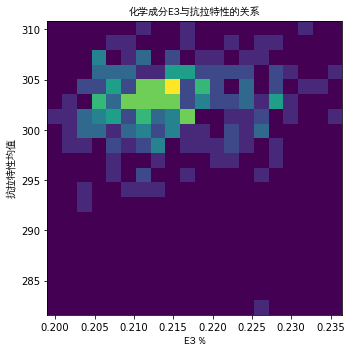

In [15]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("抗拉特性均值", fontproperties=myfont)
ax.set_title("化学成分E3与抗拉特性的关系", fontproperties=myfont)
ax.set_xlabel("E3 %", fontproperties=myfont)
hist_kangla_E3 = ax.hist2d(dist1_E3, dist2_kangla, bins=20)

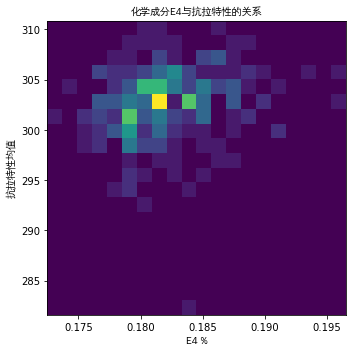

In [16]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("抗拉特性均值", fontproperties=myfont)
ax.set_title("化学成分E4与抗拉特性的关系", fontproperties=myfont)
ax.set_xlabel("E4 %", fontproperties=myfont)
hist_kangla_E4 = ax.hist2d(dist1_E4, dist2_kangla, bins=20)

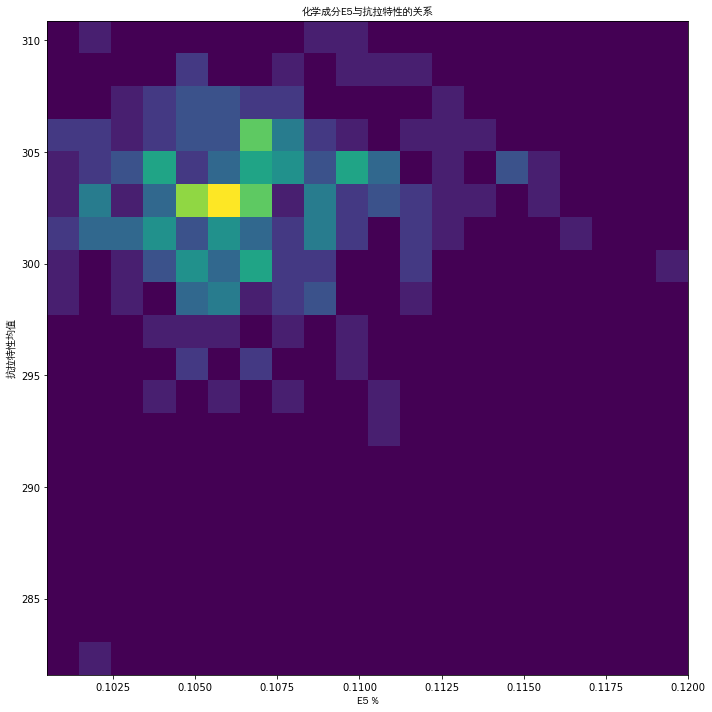

In [17]:
fig, ax = plt.subplots(figsize=(10, 10), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("抗拉特性均值", fontproperties=myfont)
ax.set_title("化学成分E5与抗拉特性的关系", fontproperties=myfont)
ax.set_xlabel("E5 %", fontproperties=myfont)
hist_kangla_E5 = ax.hist2d(dist1_E5, dist2_kangla, bins=20)

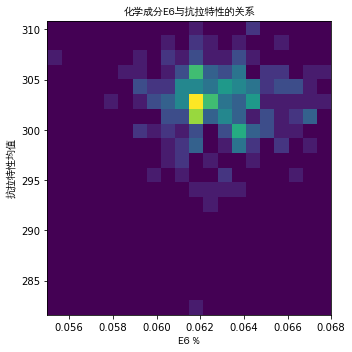

In [18]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("抗拉特性均值", fontproperties=myfont)
ax.set_title("化学成分E6与抗拉特性的关系", fontproperties=myfont)
ax.set_xlabel("E6 %", fontproperties=myfont)
hist_kangla_E6 = ax.hist2d(dist1_E6, dist2_kangla, bins=20)

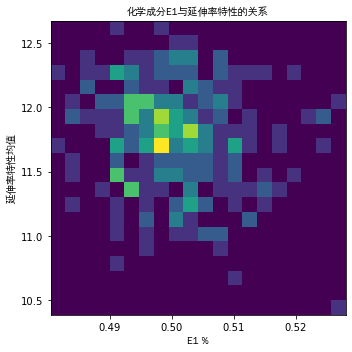

In [19]:
#延伸率

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("延伸率特性均值", fontproperties=myfont)
ax.set_title("化学成分E1与延伸率特性的关系", fontproperties=myfont)
ax.set_xlabel("E1 %", fontproperties=myfont)
hist_yanshen_E1 = ax.hist2d(dist1_E1, dist2_yanshen, bins=20)

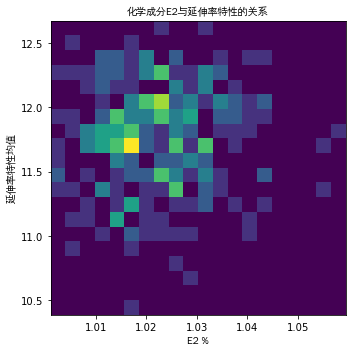

In [20]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("延伸率特性均值", fontproperties=myfont)
ax.set_title("化学成分E2与延伸率特性的关系", fontproperties=myfont)
ax.set_xlabel("E2 %", fontproperties=myfont)
hist_yanshen_E2 = ax.hist2d(dist1_E2, dist2_yanshen, bins=20)

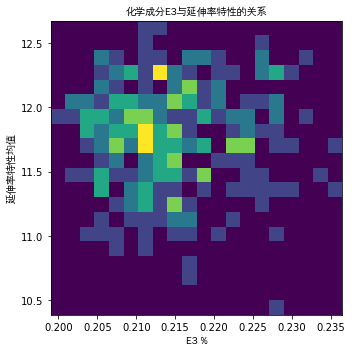

In [21]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("延伸率特性均值", fontproperties=myfont)
ax.set_title("化学成分E3与延伸率特性的关系", fontproperties=myfont)
ax.set_xlabel("E3 %", fontproperties=myfont)
hist_yanshen_E3 = ax.hist2d(dist1_E3, dist2_yanshen, bins=20)

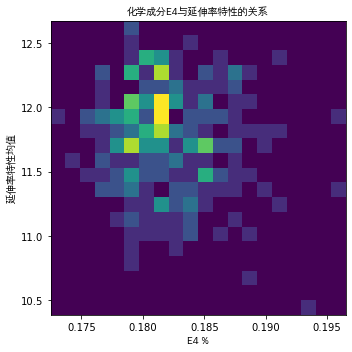

In [22]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("延伸率特性均值", fontproperties=myfont)
ax.set_title("化学成分E4与延伸率特性的关系", fontproperties=myfont)
ax.set_xlabel("E4 %", fontproperties=myfont)
hist_yanshen_E4 = ax.hist2d(dist1_E4, dist2_yanshen, bins=20)

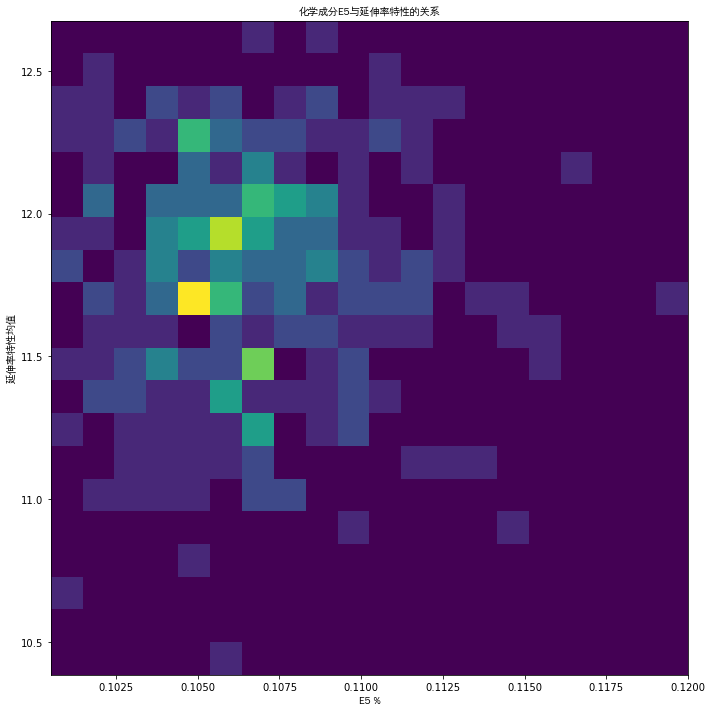

In [23]:
fig, ax = plt.subplots(figsize=(10, 10), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("延伸率特性均值", fontproperties=myfont)
ax.set_title("化学成分E5与延伸率特性的关系", fontproperties=myfont)
ax.set_xlabel("E5 %", fontproperties=myfont)
hist_yanshen_E5 = ax.hist2d(dist1_E5, dist2_yanshen, bins=20)

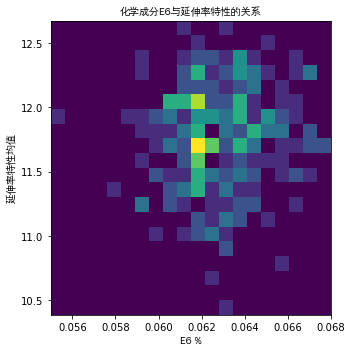

In [24]:
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("延伸率特性均值", fontproperties=myfont)
ax.set_title("化学成分E6与延伸率特性的关系", fontproperties=myfont)
ax.set_xlabel("E6 %", fontproperties=myfont)
hist_yanshen_E6 = ax.hist2d(dist1_E6, dist2_yanshen, bins=20)

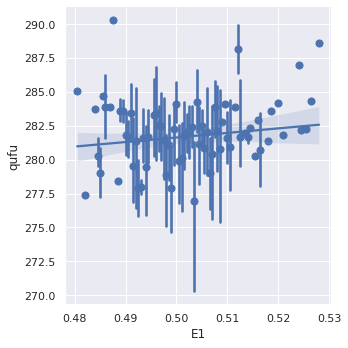

In [25]:
import seaborn as sns
dataset = pd.DataFrame(data={'E1': dist1_E1, 'E2': dist1_E2, 'E3': dist1_E3, 'E4': dist1_E4, 'E5': dist1_E5, 'E6': dist1_E6, 'qufu': dist2_qufu})
sns.set(rc = {'figure.figsize':(10,10)})
sns.lmplot(x="E1", y="qufu", data=dataset, x_estimator=np.mean)

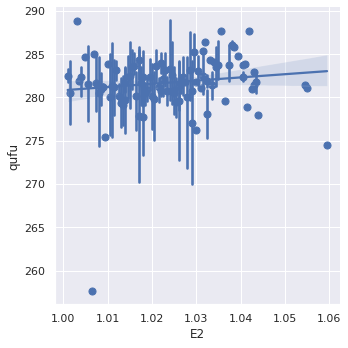

In [26]:
sns.lmplot(x="E2", y="qufu", data=dataset, x_estimator=np.mean)

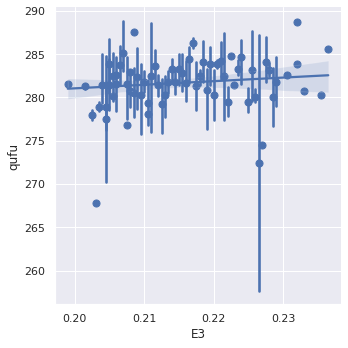

In [27]:
sns.lmplot(x="E3", y="qufu", data=dataset, x_estimator=np.mean)

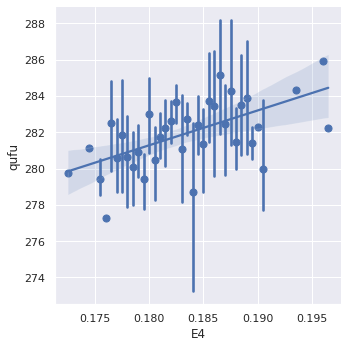

In [28]:
sns.lmplot(x="E4", y="qufu", data=dataset, x_estimator=np.mean)

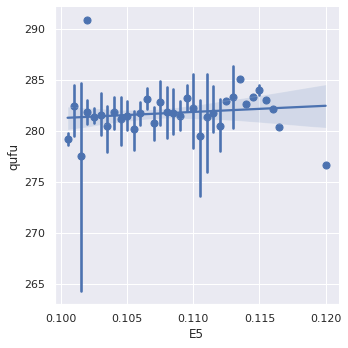

In [29]:
sns.lmplot(x="E5", y="qufu", data=dataset, x_estimator=np.mean)

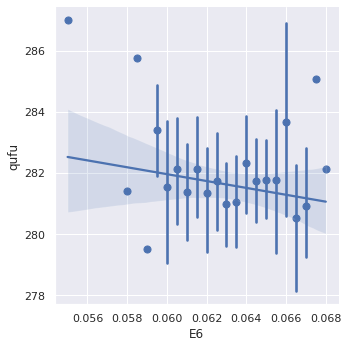

In [30]:
sns.lmplot(x="E6", y="qufu", data=dataset, x_estimator=np.mean)

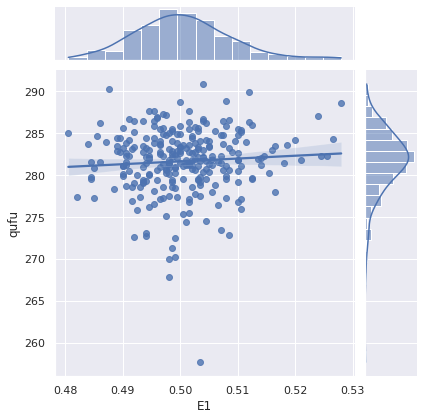

In [31]:
sns.jointplot(x="E1", y="qufu", data=dataset, kind="reg")

In [8]:
import statsmodels.api as sm
x = sm.add_constant(np.array([dist1_E1, dist1_E2, dist1_E3, dist1_E4, dist1_E5, dist1_E6]).transpose())
# 材料与屈服特性均值回归方程
y = np.array(dist2_qufu)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.247
Date:                Sun, 03 Jul 2022   Prob (F-statistic):             0.0393
Time:                        14:20:56   Log-Likelihood:                -742.34
No. Observations:                 270   AIC:                             1499.
Df Residuals:                     263   BIC:                             1524.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.3528     34.505      5.893      0.0

$ y=203.3528-39.8312x_1+44.6137x_2+1.2704x_3+244.7439x_4+57.4122x_5+27.2312x_6 $

In [33]:
# 材料与抗拉特性均值回归方程
y = np.array(dist2_kangla)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.425
Date:                Sat, 02 Jul 2022   Prob (F-statistic):             0.0268
Time:                        22:12:18   Log-Likelihood:                -699.25
No. Observations:                 270   AIC:                             1412.
Df Residuals:                     263   BIC:                             1438.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        234.8010     29.415      7.982      0.0

$ y=234.8010-25.4511x_1+33.0086x_2-3.9719x_3+216.7327x_4+63.1518x_5+23.3812x_6 $

In [34]:
# 材料与延伸率特性均值回归方程
y = np.array(dist2_yanshen)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.793
Date:                Sat, 02 Jul 2022   Prob (F-statistic):              0.101
Time:                        22:12:18   Log-Likelihood:                -124.81
No. Observations:                 270   AIC:                             263.6
Df Residuals:                     263   BIC:                             288.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9892      3.504      2.851      0.0

$ y=9.9892-7.6164_1+3.8024_2+5.2722_3-3.0590_4+1.5053_5+15.4639x_6 $

In [35]:
# 材料与屈服特性标准差回归方程
y = np.array(dist3_qufu)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.005
Date:                Sat, 02 Jul 2022   Prob (F-statistic):              0.423
Time:                        22:12:18   Log-Likelihood:                -398.92
No. Observations:                 270   AIC:                             811.8
Df Residuals:                     263   BIC:                             837.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8216      9.671      0.292      0.7

$ y=2.8216-3.6748x_1+9.2533x_2-6.5848x_3-21.5972x_4-11.2795x_5+2.4244x_6 $

In [36]:
# 材料与抗拉特性标准差回归方程
y = np.array(dist3_kangla)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8562
Date:                Sat, 02 Jul 2022   Prob (F-statistic):              0.528
Time:                        22:12:18   Log-Likelihood:                -343.91
No. Observations:                 270   AIC:                             701.8
Df Residuals:                     263   BIC:                             727.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7273      7.889     -0.092      0.9

$ y=-0.7273-0.3171x_1+8.1385x_2-4.1692x_3-18.5395x_4-5.8194x_5+16.7100x_6 $

In [37]:
# 材料与延伸特性标准差回归方程
y = np.array(dist3_yanshen)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7814
Date:                Sat, 02 Jul 2022   Prob (F-statistic):              0.585
Time:                        22:12:18   Log-Likelihood:                 151.91
No. Observations:                 270   AIC:                            -289.8
Df Residuals:                     263   BIC:                            -264.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5023      1.257      1.195      0.2

$ y=1.5023+0.1300x_1-0.3995x_2+0.3247x_3-0.3529x_4-5.6869x_5+1.8671x_6 $

In [38]:
def cal_qufu_mean(x1, x2, x3, x4, x5, x6):
    count = 203.3528 - 39.8312*x1 + 44.6137*x2 + 1.2704*x3 + 244.7439*x4 + 57.4122*x5 + 27.2312*x6
    return count

def cal_kangla_mean(x1, x2, x3, x4, x5, x6):
    count = 234.8010 - 25.4511*x1 + 33.0086*x2 - 3.9719*x3 + 216.7327*x4 + 63.1518*x5 + 23.3812*x6
    return count

def cal_yanshen_mean(x1, x2, x3, x4, x5, x6):
    count = 9.9892 - 7.6164*x1 + 3.8024*x2 + 5.2722*x3 - 3.0590*x4 + 1.5053*x5 + 15.4639*x6
    return count

def cal_qufu_std(x1, x2, x3, x4, x5, x6):
    count = 2.8216 - 3.6748*x1 + 9.2533*x2 - 6.5848*x3 - 21.5972*x4 - 11.2795*x5 + 2.4244*x6
    return count

def cal_kangla_std(x1, x2, x3, x4, x5, x6):
    count = -0.7273 + 0.3171*x1 + 8.1385*x2 - 4.1692*x3 - 18.5395*x4 - 5.8194*x5 + 16.7100*x6 
    return count

def cal_yanshen_std(x1, x2, x3, x4, x5, x6):
    count = 1.5023 + 0.1300*x1 - 0.3995*x2 + 0.3247*x3 - 0.3529*x4 - 5.6869*x5 + 1.8671*x6
    return count

def calcutate_all(ronglianhao):
    x1 = pd_chem_E1[ronglianhao]
    x2 = pd_chem_E2[ronglianhao]
    x3 = pd_chem_E3[ronglianhao]
    x4 = pd_chem_E4[ronglianhao]
    x5 = pd_chem_E5[ronglianhao]
    x6 = pd_chem_E6[ronglianhao]
    print("屈服均值: " + str(cal_qufu_mean(x1, x2, x3, x4, x5, x6)) + "\n"
          "抗拉均值: " + str(cal_kangla_mean(x1, x2, x3, x4, x5, x6)) + "\n"
          "延伸率均值: " + str(cal_yanshen_mean(x1, x2, x3, x4, x5, x6)) + "\n"
          "屈服标准差: " + str(cal_qufu_std(x1, x2, x3, x4, x5, x6)) + "\n"
          "抗拉标准差: " + str(cal_kangla_std(x1, x2, x3, x4, x5, x6)) + "\n"
          "延伸率标准差: " + str(cal_yanshen_std(x1, x2, x3, x4, x5, x6)) + "\n"
          )

In [39]:
#熔炼号90624
calcutate_all(90624)

屈服均值: 281.0436817499999
抗拉均值: 302.12715380000003
延伸率均值: 11.72966825
屈服标准差: 4.044883449999997
抗拉标准差: 3.9242447999999994
延伸率标准差: 0.6836438499999999



In [40]:
#熔炼号90626
calcutate_all(90626)

屈服均值: 280.14576220000004
抗拉均值: 301.2504561
延伸率均值: 11.75250665
屈服标准差: 4.09420725
抗拉标准差: 3.896615800000003
延伸率标准差: 0.7077119000000001



In [41]:
#熔炼号90627
calcutate_all(90627)

屈服均值: 281.1477789
抗拉均值: 302.06638649999996
延伸率均值: 11.8371067
屈服标准差: 4.187677149999999
抗拉标准差: 3.9974252999999997
延伸率标准差: 0.6685442000000003



In [42]:
#熔炼号90628
calcutate_all(90628)

屈服均值: 281.59236580000004
抗拉均值: 302.4213721
延伸率均值: 11.84703395
屈服标准差: 4.235370449999999
抗拉标准差: 4.034019550000003
延伸率标准差: 0.66078115



In [43]:
#熔炼号90629
calcutate_all(90629)

屈服均值: 280.6431412
抗拉均值: 301.66065395000004
延伸率均值: 11.799698150000001
屈服标准差: 4.13804585
抗拉标准差: 3.9504264000000022
延伸率标准差: 0.6839600000000002



In [44]:
#熔炼号90630
calcutate_all(90630)

屈服均值: 282.0879321
抗拉均值: 302.9229411999999
延伸率均值: 11.77570985
屈服标准差: 4.159440649999999
抗拉标准差: 4.0227504
延伸率标准差: 0.6695417499999997



In [45]:
#熔炼号90631
calcutate_all(90631)

屈服均值: 281.16844065
抗拉均值: 302.0872306499999
延伸率均值: 11.8406746
屈服标准差: 4.1261977000000005
抗拉标准差: 3.898947100000001
延伸率标准差: 0.6666137999999998



In [46]:
# for i in range(len(dist2_qufu)):
#     print(dist2_qufu[i])

# for key in pd_chem_E1:
#     if key in phy_dict:
#         E1_list.append(pd_chem_E1[key])
#         E2_list.append(pd_chem_E2[key])
#         E3_list.append(pd_chem_E3[key])
#         E4_list.append(pd_chem_E4[key])
#         E5_list.append(pd_chem_E5[key])
#         E6_list.append(pd_chem_E6[key])
        
#         phy_dict_qufu_mean_list.append(phy_dict_qufu_mean[key])
#         phy_dict_qufu_std_list.append(phy_dict_qufu_std[key])
#         phy_dict_kangla_mean_list.append(phy_dict_kangla_mean[key])
#         phy_dict_kangla_std_list.append(phy_dict_kangla_std[key])
#         phy_dict_yanshen_mean_list.append(phy_dict_yanshen_mean[key])
#         phy_dict_yanshen_std_list.append(phy_dict_yanshen_std[key])
        
# np_E1 = np.array(E1_list)
# np_E2 = np.array(E2_list)
# np_E3 = np.array(E3_list)
# np_E4 = np.array(E4_list)
# np_E5 = np.array(E5_list)
# np_E6 = np.array(E6_list)
new_ronglian = []
for key in pd_chem_E1:
    if key in phy_dict:
        new_ronglian.append(key)
        
# data = pd.DataFrame({'熔炼号': new_ronglian, '屈服均值': phy_dict_qufu_mean_list, '抗拉均值': phy_dict_kangla_mean_list, '延伸率均值': phy_dict_yanshen_mean_list,
#                     '屈服标准差': phy_dict_qufu_std_list, '抗拉标准差': phy_dict_kangla_std_list, '延伸率标准差': phy_dict_yanshen_std_list, 'E1': np_E1, 'E2': np_E2,
#                     'E3': np_E3, 'E4': np_E4, 'E5': np_E5, 'E6': np_E6})

# data.to_excel("/home/bobmaster/Downloads/数学建模/data.xlsx", sheet_name="Sheet1")

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
  
x = np.array([dist1_E1, dist1_E2, dist1_E3, dist1_E4, dist1_E5, dist1_E6]).transpose()
y = np.array(dist2_qufu)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)
ronglianhao = 90623
y_pred = model.predict(np.array([pd_chem_E1[ronglianhao], pd_chem_E2[ronglianhao], pd_chem_E3[ronglianhao], pd_chem_E4[ronglianhao], pd_chem_E5[ronglianhao], pd_chem_E6[ronglianhao]]).reshape(-1,6))
y_pred

array([282.11678074])

In [48]:
model.coef_

array([ -21.09158051,   24.71549855,   -5.01065116,  226.01198632,
         25.40913652, -139.41772546])

In [49]:
model.intercept_

232.98837814693027

In [50]:
# 材料与屈服特性均值多元线性回归方程
x = np.array([dist1_E1, dist1_E2, dist1_E3, dist1_E4, dist1_E5, dist1_E6]).transpose()
y = np.array(dist2_qufu)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)
model.coef_

array([ -21.09158051,   24.71549855,   -5.01065116,  226.01198632,
         25.40913652, -139.41772546])

In [51]:
model.intercept_

232.98837814693027

### 精确方程
$ y=232.98837814693027-21.09158051X_1+24.71549855X_2-5.01065116X_3+226.01198632X_4+25.40913652X_5-139.41772546X_6 $
### 精简方程
$ y=232.9884-21.0916X_1+24.7155X_2-5.0107X_3+226.0120X_4+25.4091X_5-139.4177X_6 $

In [52]:
# 材料与抗拉特性均值多元线性回归方程
x = np.array([dist1_E1, dist1_E2, dist1_E3, dist1_E4, dist1_E5, dist1_E6]).transpose()
y = np.array(dist2_kangla)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)
model.coef_

array([  -8.33255893,   10.87035246,   -4.29381787,  197.08886361,
         30.81475037, -133.2003945 ])

In [53]:
model.intercept_

265.8372810566513

### 精确方程
$ y=265.8372810566513-8.33255893X_1+10.87035246X_2-4.29381787X_3+197.08886361X_4+30.81475037X_5-133.2003945X_6 $
### 精简方程
$ y=265.8373-8.3326X_1+10.8704X_2-4.2938X_3+197.0889X_4+30.8148X_5-133.2004X_6 $

In [54]:
# 材料与延伸特性均值多元线性回归方程
x = np.array([dist1_E1, dist1_E2, dist1_E3, dist1_E4, dist1_E5, dist1_E6]).transpose()
y = np.array(dist2_yanshen)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)
model.coef_

array([-5.07378937,  5.7620131 ,  1.5875269 , -8.09637312,  9.06779244,
       22.52728787])

In [55]:
model.intercept_

7.172527937298794

### 精确方程
$ y=7.172527937298794-5.07378937X_1+5.7620131X_2+1.5875269X_3-8.09637312X_4+9.06779244X_5+22.52728787X_6 $
### 精简方程
$ y=7.1725-5.0738X_1+5.7620X_2+1.5875X_3-8.0964X_4+9.0678X_5+22.5273X_6 $

In [56]:
x = np.array([dist1_E1, dist1_E2, dist1_E3, dist1_E4, dist1_E5, dist1_E6]).transpose()

def cal_qufu_mean(ronglianhao):
    y = np.array(dist2_qufu)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model = LinearRegression().fit(X_train, y_train)

    count = model.predict(np.array([pd_chem_E1[ronglianhao], pd_chem_E2[ronglianhao], 
    pd_chem_E3[ronglianhao], pd_chem_E4[ronglianhao], pd_chem_E5[ronglianhao], 
    pd_chem_E6[ronglianhao]]).reshape(-1,6))
    return count

def cal_kangla_mean(ronglianhao):
    y = np.array(dist2_kangla)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model = LinearRegression().fit(X_train, y_train)

    count = model.predict(np.array([pd_chem_E1[ronglianhao], pd_chem_E2[ronglianhao], 
    pd_chem_E3[ronglianhao], pd_chem_E4[ronglianhao], pd_chem_E5[ronglianhao], 
    pd_chem_E6[ronglianhao]]).reshape(-1,6))
    return count

def cal_yanshen_mean(ronglianhao):
    y = np.array(dist2_yanshen)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model = LinearRegression().fit(X_train, y_train)

    count = model.predict(np.array([pd_chem_E1[ronglianhao], pd_chem_E2[ronglianhao], 
    pd_chem_E3[ronglianhao], pd_chem_E4[ronglianhao], pd_chem_E5[ronglianhao], 
    pd_chem_E6[ronglianhao]]).reshape(-1,6))
    return count

def cal_qufu_std(ronglianhao):
    y = np.array(dist3_qufu)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model = LinearRegression().fit(X_train, y_train)

    count = model.predict(np.array([pd_chem_E1[ronglianhao], pd_chem_E2[ronglianhao], 
    pd_chem_E3[ronglianhao], pd_chem_E4[ronglianhao], pd_chem_E5[ronglianhao], 
    pd_chem_E6[ronglianhao]]).reshape(-1,6))
    return count

def cal_kangla_std(ronglianhao):
    y = np.array(dist3_kangla)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model = LinearRegression().fit(X_train, y_train)

    count = model.predict(np.array([pd_chem_E1[ronglianhao], pd_chem_E2[ronglianhao], 
    pd_chem_E3[ronglianhao], pd_chem_E4[ronglianhao], pd_chem_E5[ronglianhao], 
    pd_chem_E6[ronglianhao]]).reshape(-1,6))
    return count

def cal_yanshen_std(ronglianhao):
    y = np.array(dist3_yanshen)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model = LinearRegression().fit(X_train, y_train)

    count = model.predict(np.array([pd_chem_E1[ronglianhao], pd_chem_E2[ronglianhao], 
    pd_chem_E3[ronglianhao], pd_chem_E4[ronglianhao], pd_chem_E5[ronglianhao], 
    pd_chem_E6[ronglianhao]]).reshape(-1,6))
    return count

def calcutate_all(ronglianhao):
    print("屈服均值: " + str(cal_qufu_mean(ronglianhao)) + "\n"
          "抗拉均值: " + str(cal_kangla_mean(ronglianhao)) + "\n"
          "延伸率均值: " + str(cal_yanshen_mean(ronglianhao)) + "\n"
          "屈服标准差: " + str(cal_qufu_std(ronglianhao)) + "\n"
          "抗拉标准差: " + str(cal_kangla_std(ronglianhao)) + "\n"
          "延伸率标准差: " + str(cal_yanshen_std(ronglianhao)) + "\n"
        )




In [57]:
# 熔炼号 90624
calcutate_all(90624)

屈服均值: [281.04919773]
抗拉均值: [302.13923671]
延伸率均值: [11.75333675]
屈服标准差: [4.06391763]
抗拉标准差: [3.6079243]
延伸率标准差: [0.68167218]



In [58]:
# 熔炼号 90626
calcutate_all(90626)

屈服均值: [280.5012662]
抗拉均值: [301.6395381]
延伸率均值: [11.70884635]
屈服标准差: [4.0805444]
抗拉标准差: [3.56479364]
延伸率标准差: [0.7105368]



In [59]:
# 熔炼号 90627
calcutate_all(90627)

屈服均值: [281.1057409]
抗拉均值: [302.02799232]
延伸率均值: [11.85466945]
屈服标准差: [4.19329091]
抗拉标准差: [3.67943761]
延伸率标准差: [0.65688161]



In [60]:
# 熔炼号 90628
calcutate_all(90628)

屈服均值: [281.5443029]
抗拉均值: [302.35074987]
延伸率均值: [11.87558182]
屈服标准差: [4.27624867]
抗拉标准差: [3.74579568]
延伸率标准差: [0.64559413]



In [61]:
# 熔炼号 90629
calcutate_all(90629)

屈服均值: [280.77029025]
抗拉均值: [301.80837018]
延伸率均值: [11.7935581]
屈服标准差: [4.13601804]
抗拉标准差: [3.62497317]
延伸率标准差: [0.67978443]



In [62]:
# 熔炼号 90630
calcutate_all(90630)

屈服均值: [282.06368924]
抗拉均值: [302.8621545]
延伸率均值: [11.81286397]
屈服标准差: [4.22813292]
抗拉标准差: [3.73535752]
延伸率标准差: [0.65672621]



In [63]:
# 熔炼号 90631
calcutate_all(90631)

屈服均值: [281.24719713]
抗拉均值: [302.18315812]
延伸率均值: [11.82315402]
屈服标准差: [4.12274657]
抗拉标准差: [3.59635772]
延伸率标准差: [0.66175219]



In [64]:

# 材料与屈服特性标准差多元线性回归方程
x = np.array([dist1_E1, dist1_E2, dist1_E3, dist1_E4, dist1_E5, dist1_E6]).transpose()
y = np.array(dist3_qufu)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)
model.coef_

array([  4.61087137,   7.89819425, -15.91215619, -26.69428153,
        -5.1575353 , -40.74486056])

In [65]:
model.intercept_

5.062939344879167

### 精确方程
$ y=5.062939344879167+4.61087137X_1+7.89819425X_2-15.91215619X_3-26.69428153X_4-5.1575353X_5-40.74486056X_6 $
### 精简方程
$ y=5.0629+4.6109X_1+7.8982X_2-15.9122X_3-26.6943X_4-5.1575X_5-40.7449X_6 $

In [66]:
# 材料与抗拉特性标准差多元线性回归方程
x = np.array([dist1_E1, dist1_E2, dist1_E3, dist1_E4, dist1_E5, dist1_E6]).transpose()
y = np.array(dist3_kangla)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)
model.coef_

array([  5.52211393,   7.22300547, -13.92408713, -20.73062805,
        -0.08048425, -21.0089931 ])

In [67]:
model.intercept_

1.5298723495190005

### 精确方程
$ y=1.5298723495190005+5.52211393X_1+7.22300547X_2-13.92408713X_3-20.73062805X_4-0.08048425X_5-21.0089931X_6 $
### 精简方程
$ y=1.5299+5.5221X_1+7.2230X_2-13.9241X_3-20.7306X_4-0.0805X_5-21.0090X_6 $

In [68]:
# 材料与延伸率特性标准差多元线性回归方程
x = np.array([dist1_E1, dist1_E2, dist1_E3, dist1_E4, dist1_E5, dist1_E6]).transpose()
y = np.array(dist3_yanshen)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)
model.coef_

array([ 1.31314118, -1.7168275 ,  0.19307053, -0.86744266, -4.87384482,
       -4.01341483])

In [69]:
model.intercept_

2.6570980963371644

### 精确方程
$ y=2.6570980963371644+1.31314118X_1-1.7168275X_2+0.19307053X_3-0.86744266X_4-4.87384482X_5-4.01341483X_6 $
### 精简方程
$ y=2.6571+1.3131X_1-1.7168X_2+0.1931X_3-0.8674X_4-4.8738X_5-4.0134X_6 $

In [70]:
dataset = pd.DataFrame({'熔炼号': new_ronglian, '屈服均值': phy_dict_qufu_mean_list, '抗拉均值': phy_dict_kangla_mean_list, '延伸率均值': phy_dict_yanshen_mean_list,
                    '屈服标准差': phy_dict_qufu_std_list, '抗拉标准差': phy_dict_kangla_std_list, '延伸率标准差': phy_dict_yanshen_std_list, 'E1': np_E1, 'E2': np_E2,
                    'E3': np_E3, 'E4': np_E4, 'E5': np_E5, 'E6': np_E6})

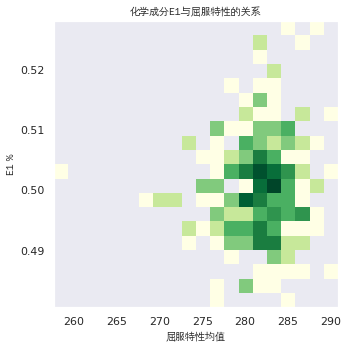

In [71]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True,
                        tight_layout=True)

ax.set_ylabel("E1 %", fontproperties=myfont)

ax.set_title("化学成分E1与屈服特性的关系", fontproperties=myfont)
ax.set_xlabel("屈服特性均值", fontproperties=myfont)
hist_qufu_E1 = ax.hist2d(dist2_qufu, dist1_E1, bins=20, norm=LogNorm(), cmap = "YlGn")

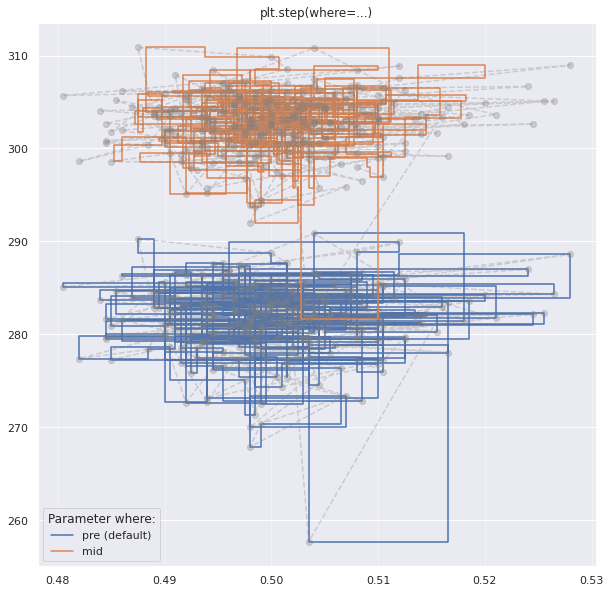

In [72]:
import numpy as np
import matplotlib.pyplot as plt


plt.step(dataset.iloc[:,7], dataset.iloc[:,1], label='pre (default)')
plt.plot(dataset.iloc[:,7], dataset.iloc[:,1], 'o--', color='grey', alpha=0.3)

plt.step(dataset.iloc[:,7], dataset.iloc[:,2], where='mid', label='mid')
plt.plot(dataset.iloc[:,7], dataset.iloc[:,2], 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()


<AxesSubplot:>

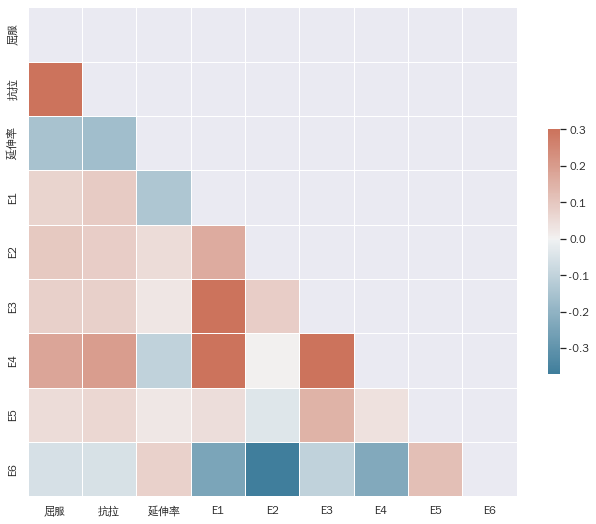

In [9]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
sns.set_theme(style="white")
sns.set(font="WenQuanYi Zen Hei")
dataset = pd.DataFrame({'屈服': phy_dict_qufu_mean_list, '抗拉': phy_dict_kangla_mean_list, '延伸率': phy_dict_yanshen_mean_list,
                     'E1': np_E1, 'E2': np_E2, 'E3': np_E3, 'E4': np_E4, 'E5': np_E5, 'E6': np_E6})


# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
sns.set(font="WenQuanYi Zen Hei")

dataset = pd.DataFrame({'熔炼号': new_ronglian, '屈服均值': phy_dict_qufu_mean_list, '抗拉均值': phy_dict_kangla_mean_list, '延伸率均值': phy_dict_yanshen_mean_list,
                    '屈服标准差': phy_dict_qufu_std_list, '抗拉标准差': phy_dict_kangla_std_list, '延伸率标准差': phy_dict_yanshen_std_list, 'E1': np_E1, 'E2': np_E2,
                    'E3': np_E3, 'E4': np_E4, 'E5': np_E5, 'E6': np_E6})


<AxesSubplot:xlabel='E1', ylabel='屈服均值'>

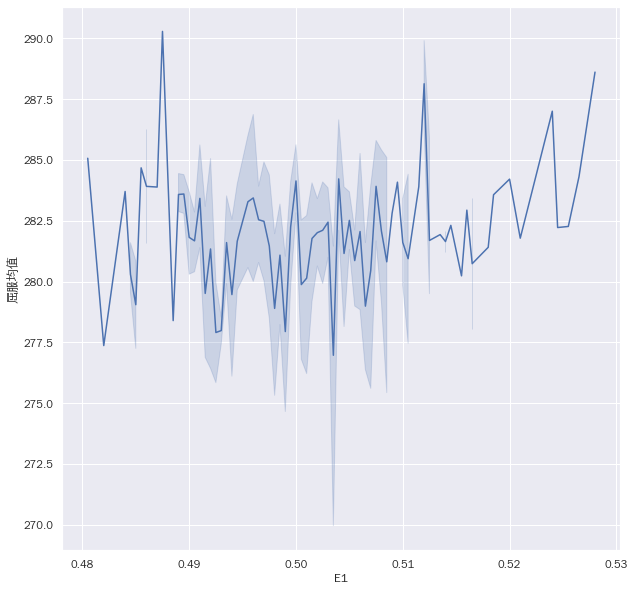

In [75]:
sns.lineplot(x="E1", y="屈服均值", data=dataset)

<AxesSubplot:xlabel='E1', ylabel='抗拉均值'>

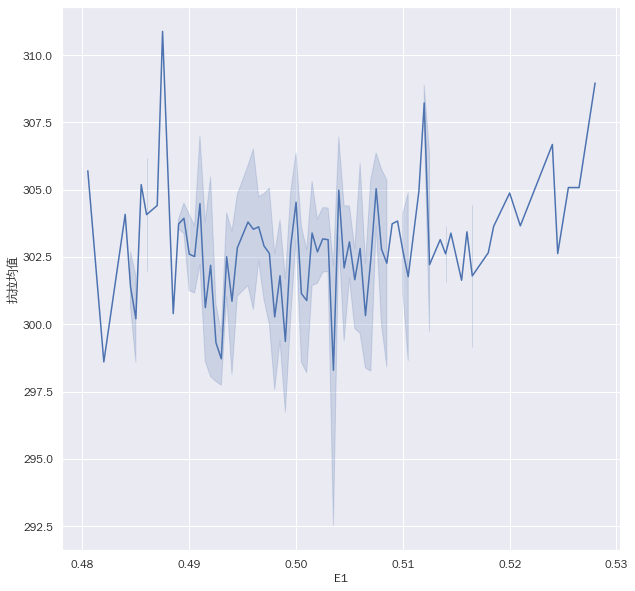

In [76]:
sns.lineplot(x="E1", y="抗拉均值", data=dataset)

<AxesSubplot:xlabel='E1', ylabel='延伸率均值'>

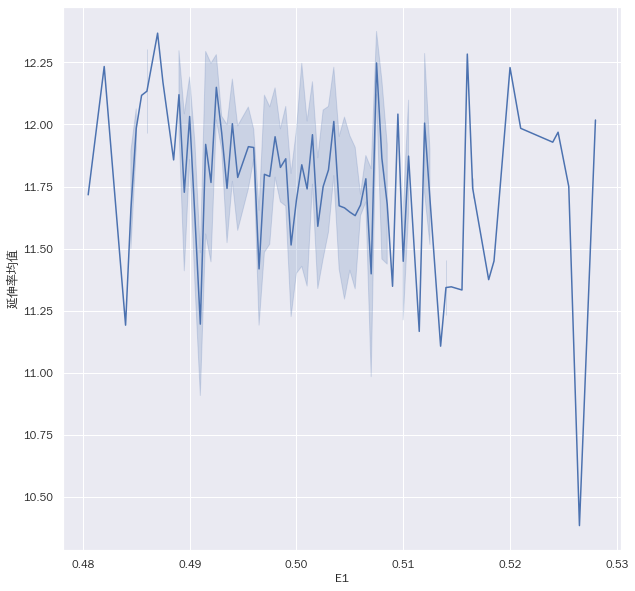

In [77]:
sns.lineplot(x="E1", y="延伸率均值", data=dataset)

<AxesSubplot:xlabel='E2', ylabel='屈服均值'>

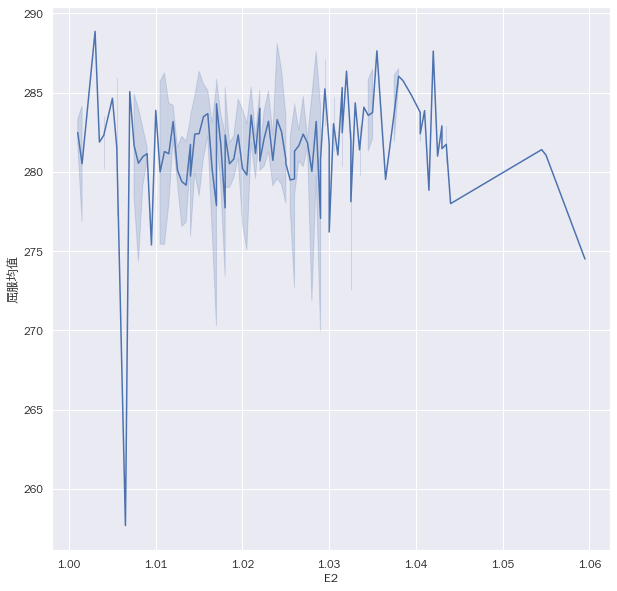

In [78]:
sns.lineplot(x="E2", y="屈服均值", data=dataset)

<AxesSubplot:xlabel='E2', ylabel='抗拉均值'>

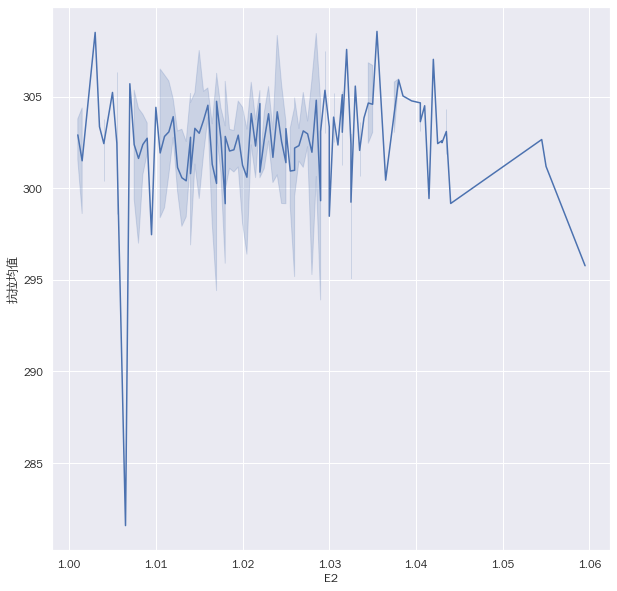

In [79]:
sns.lineplot(x="E2", y="抗拉均值", data=dataset)

<AxesSubplot:xlabel='E2', ylabel='延伸率均值'>

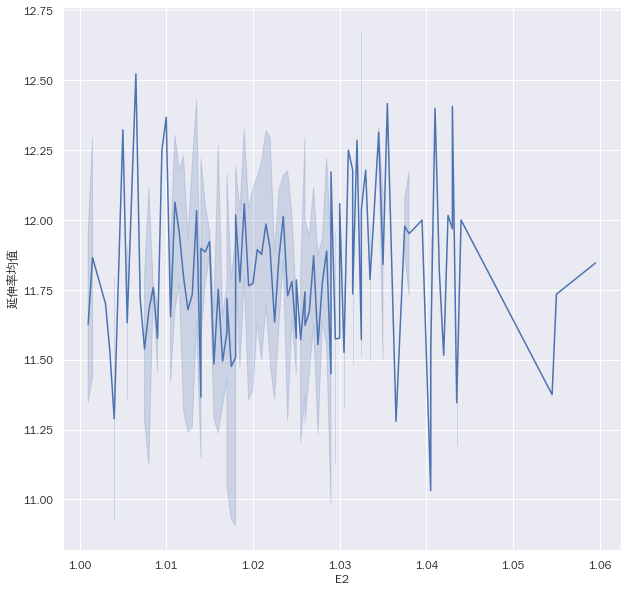

In [80]:
sns.lineplot(x="E2", y="延伸率均值", data=dataset)

<AxesSubplot:xlabel='E3', ylabel='屈服均值'>

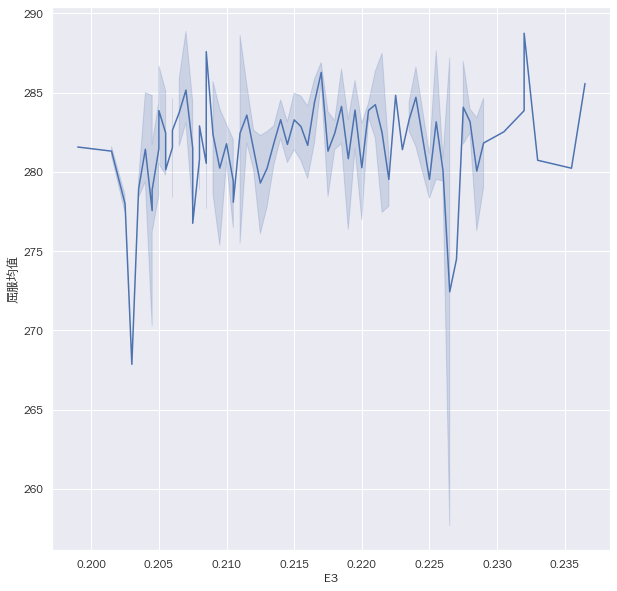

In [81]:
sns.lineplot(x="E3", y="屈服均值", data=dataset)

<AxesSubplot:xlabel='E3', ylabel='抗拉均值'>

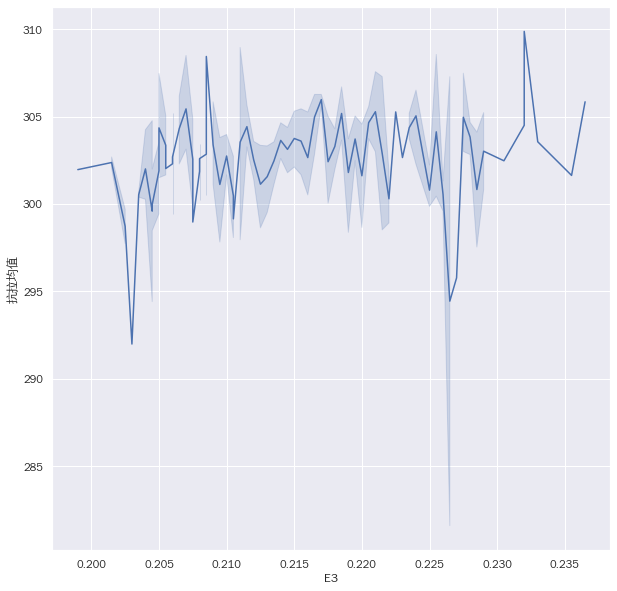

In [82]:
sns.lineplot(x="E3", y="抗拉均值", data=dataset)

<AxesSubplot:xlabel='E3', ylabel='延伸率均值'>

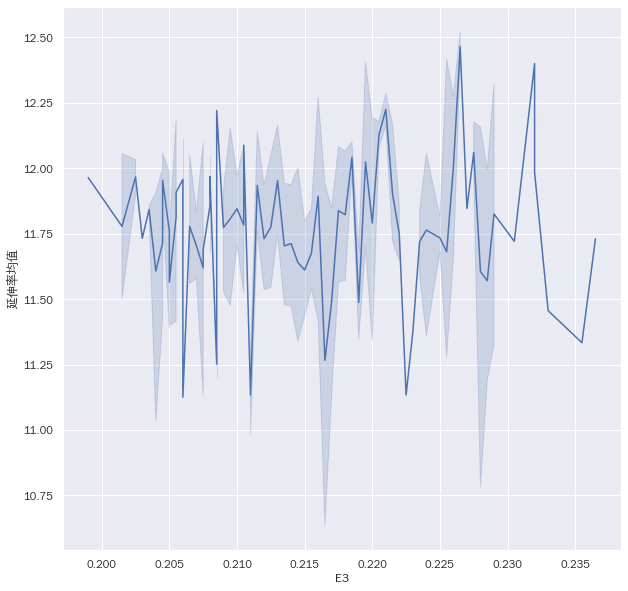

In [83]:
sns.lineplot(x="E3", y="延伸率均值", data=dataset)

<AxesSubplot:xlabel='E4', ylabel='屈服均值'>

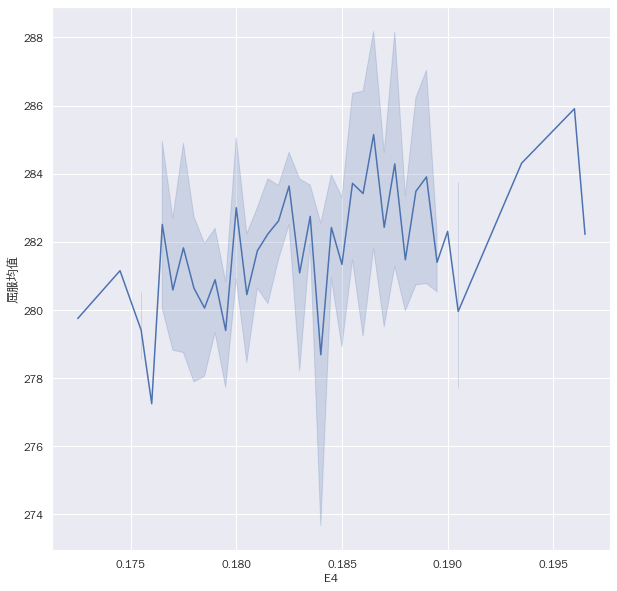

In [84]:
sns.lineplot(x="E4", y="屈服均值", data=dataset)

<AxesSubplot:xlabel='E4', ylabel='抗拉均值'>

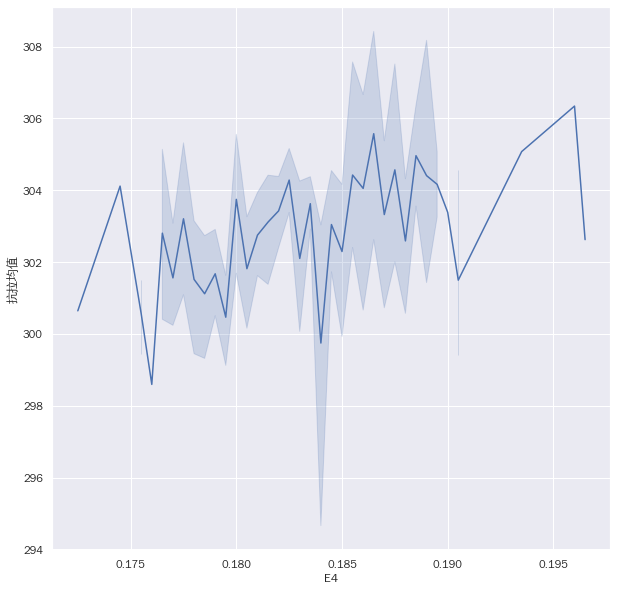

In [85]:
sns.lineplot(x="E4", y="抗拉均值", data=dataset)

<AxesSubplot:xlabel='E4', ylabel='延伸率均值'>

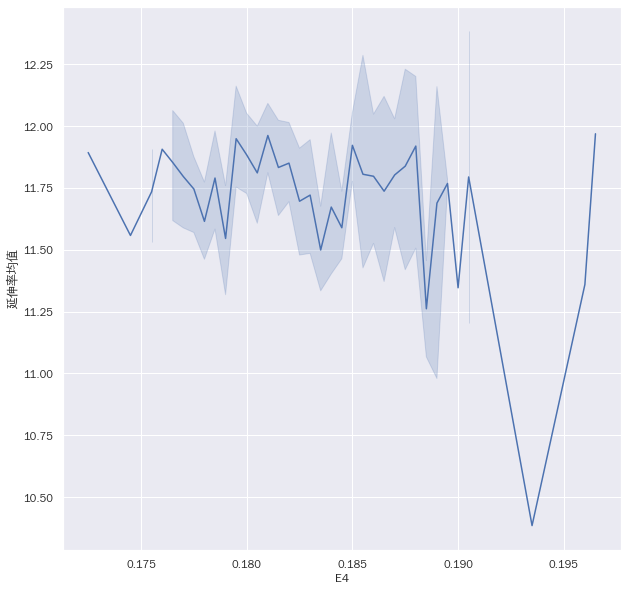

In [86]:
sns.lineplot(x="E4", y="延伸率均值", data=dataset)

<AxesSubplot:xlabel='E5', ylabel='屈服均值'>

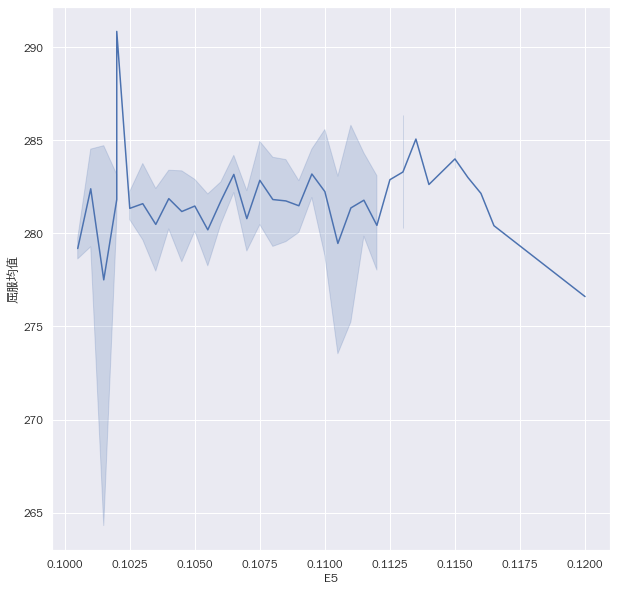

In [87]:
sns.lineplot(x="E5", y="屈服均值", data=dataset)

<AxesSubplot:xlabel='E5', ylabel='抗拉均值'>

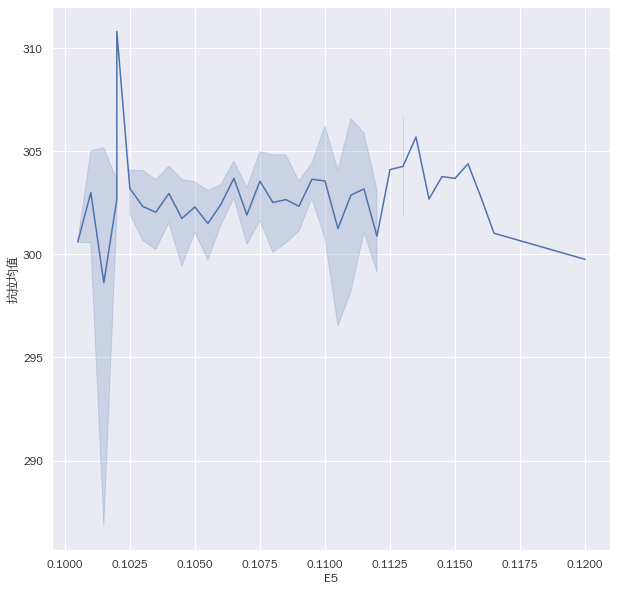

In [88]:
sns.lineplot(x="E5", y="抗拉均值", data=dataset)

<AxesSubplot:xlabel='E5', ylabel='延伸率均值'>

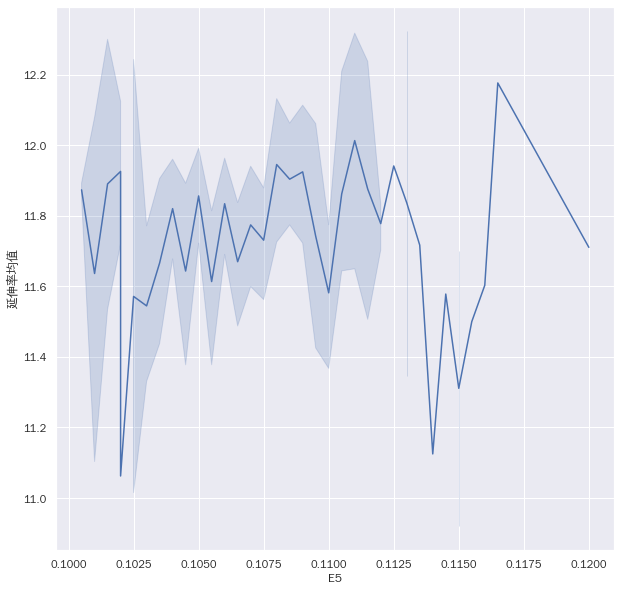

In [89]:
sns.lineplot(x="E5", y="延伸率均值", data=dataset)

<AxesSubplot:xlabel='E6', ylabel='屈服均值'>

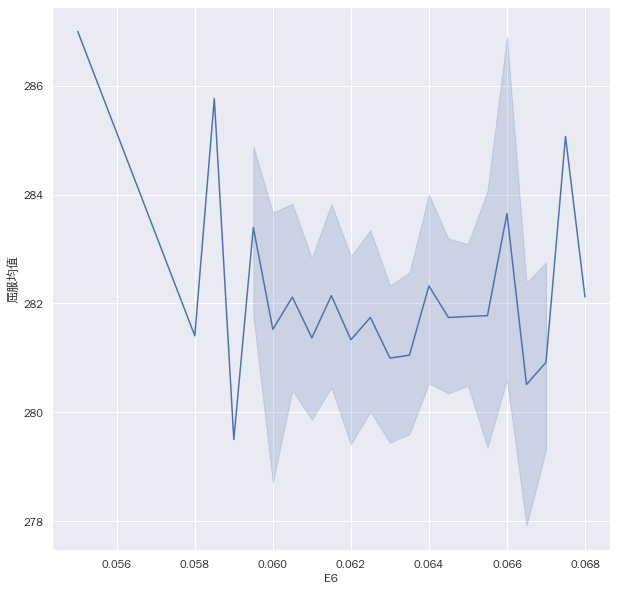

In [90]:
sns.lineplot(x="E6", y="屈服均值", data=dataset)

<AxesSubplot:xlabel='E6', ylabel='抗拉均值'>

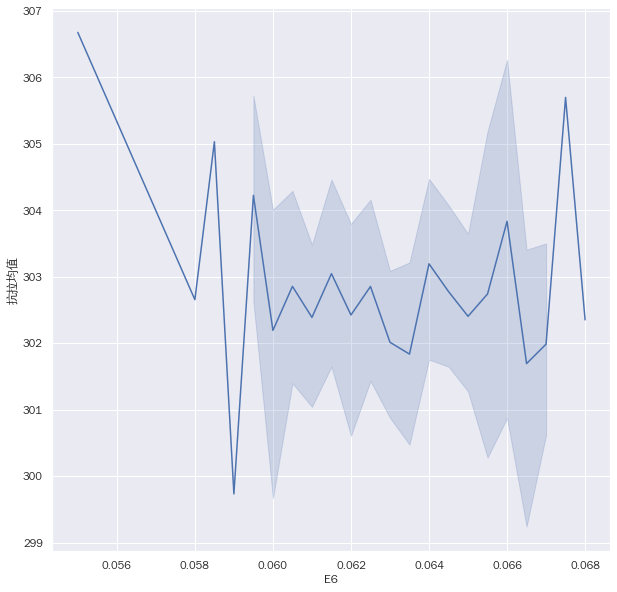

In [91]:
sns.lineplot(x="E6", y="抗拉均值", data=dataset)

<AxesSubplot:xlabel='E6', ylabel='延伸率均值'>

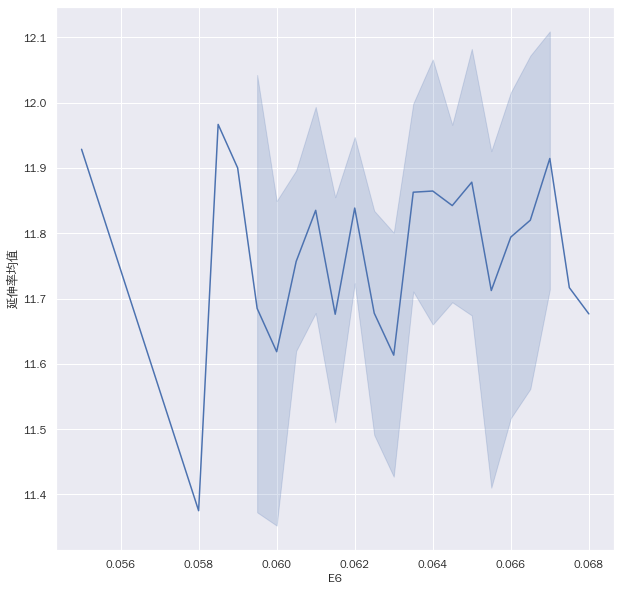

In [92]:
sns.lineplot(x="E6", y="延伸率均值", data=dataset)

In [97]:
sns.set(rc={"figure.figsize": (5, 5)}, font="WenQuanYi Zen Hei")

<AxesSubplot:xlabel='E6', ylabel='延伸率均值'>

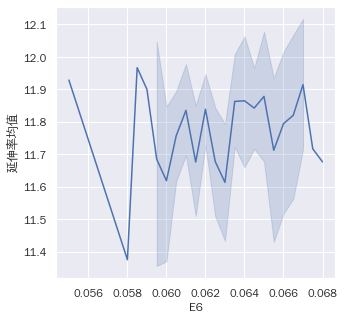

In [98]:
sns.lineplot(x="E6", y="延伸率均值", data=dataset)